<a href="https://colab.research.google.com/github/hiu04/Attrition_Project/blob/main/Attrition_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting and improving customer attrition - EDA

In [ ]:
# Importing all necessary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Cleaning and viewing the data

## Cleaning the data

In this section we will:


*   Upload the data
*   Segment the different variables
*   Get rid of empty records





In [ ]:
# Importing file
data = pd.read_csv(
    "/content/Attrition View.csv",
    delimiter=",")

data.head()
data['EBILL'].head()


0    0
1    0
2    0
3    0
4    0
Name: EBILL, dtype: int64

In [ ]:
# Some indications about the DataFrame

print(data.shape)

index = data.index
columns = data.columns

print(index)
print(columns)

(65000, 41)
RangeIndex(start=0, stop=65000, step=1)
Index(['CUSTOMER_ID', 'GENDER_ID', 'FIRST_NAME', 'LAST_NAME', 'PHONE_1',
       'EMAIL', 'AGE', 'ENERGY_USAGE_PER_MONTH', 'ENERGY_EFFICIENCY',
       'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
       'ATTRITION_STATUS', 'HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
       'PV_ZONING', 'WIND_ZONING', 'SMART_METER_COMMENTS', 'IS_CAR_OWNER',
       'HAS_EV', 'HAS_PV', 'HAS_WIND', 'TENURE', 'EBILL', 'IN_WARRANTY',
       'CITY', 'CURRENT_OFFER', 'CURRENT_CONTRACT', 'CURRENT_ISSUE',
       'MARITAL_STATUS', 'EDUCATION', 'SEGMENT', 'EMPLOYMENT',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_1', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_3', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_5', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')


In [ ]:
# How many records do we have? Dropping missing values
## length of database
initial_database_length = len(data)

print(f"The database has initialy {initial_database_length} records")
## number of missing values per column

def missing_values_calculation(data):

  #We store the number of missing values for every column
  total = data.isnull().sum().sort_values(ascending=False)

  #We make a new column contaning the percentage of missing values
  #out of the total number of values
  percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

  #We now make a DF containing these 2 values
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  #And we print the DataFrame
  display(missing)

#We call the function
missing_values_calculation(data)


The database has initialy 65000 records


,Total,Percent
SEGMENT,11635,0.179
CURRENT_CONTRACT,6955,0.107
HAS_WIND,0,0.000
EBILL,0,0.000
IN_WARRANTY,0,0.000
CITY,0,0.000
CURRENT_OFFER,0,0.000
CURRENT_ISSUE,0,0.000
MARITAL_STATUS,0,0.000
EDUCATION,0,0.000


In [ ]:
## drop the missing values
data = data.dropna()

## new data length
print(f"Now the dataset has {len(data)} records")

Now the dataset has 51610 records


### Analysing types and classify variables

In [ ]:
# Types of columns
data.dtypes

CUSTOMER_ID                             int64
GENDER_ID                               int64
FIRST_NAME                             object
LAST_NAME                              object
PHONE_1                                object
EMAIL                                  object
AGE                                     int64
ENERGY_USAGE_PER_MONTH                  int64
ENERGY_EFFICIENCY                     float64
IS_REGISTERED_FOR_ALERTS                int64
OWNS_HOME                               int64
COMPLAINTS                              int64
ATTRITION_STATUS                        int64
HAS_THERMOSTAT                          int64
HAS_HOME_AUTOMATION                     int64
PV_ZONING                               int64
WIND_ZONING                             int64
SMART_METER_COMMENTS                   object
IS_CAR_OWNER                            int64
HAS_EV                                  int64
HAS_PV                                  int64
HAS_WIND                          

In [ ]:
# Dividing the Data Columns into categories for better treatment
## our variable of interest is "ATTRITION_STATUS" because we are building a model where we want to improve customer attrition

interest_var = 'ATTRITION_STATUS'

## some columns of the data are not interesting because they are too personnal and not relevant for the analysis but we will keep phone number for analysis purposes
notinteresting_var = ['CUSTOMER_ID', 'FIRST_NAME', 'LAST_NAME','EMAIL']

### let's drop these variables

data = data.drop(columns=notinteresting_var)

## some columns contain numerial_data and others contain categorical data

numerical_var = ['AGE', 'ENERGY_EFFICIENCY',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
                  'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'ENERGY_USAGE_PER_MONTH', 'TENURE']

dummy_var = ['GENDER_ID', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
              'ATTRITION_STATUS','HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
              'PV_ZONING','WIND_ZONING', 'IS_CAR_OWNER','HAS_EV', 'HAS_PV',
              'HAS_WIND','EBILL','IN_WARRANTY']



# Identifying categorical variables by excluding dummy, target and
# numerical variables
categorical_var = [column for column in data.columns # == "object"
                    if column not in (dummy_var + numerical_var + [interest_var] + ['PHONE_1'])]

In [ ]:
# Displaying numerical_var, categorial_var

data[numerical_var].head()

,AGE,ENERGY_EFFICIENCY,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1,ENERGY_USAGE_PER_MONTH,TENURE
0,44,0.390,56049,43703,26666,26666,28642,26666,22963,20500,5080,13
1,34,0.356,52098,40740,26666,26666,26666,26666,21481,20500,4970,11
2,39,0.628,52098,40740,24691,24691,26666,24691,21481,20500,9250,68
3,37,0.335,52098,40740,24691,24691,26666,24691,20000,20500,4330,33
5,65,0.333,48148,37777,24691,24691,24691,24691,20000,20500,5200,41


In [ ]:
# Displaying categorical_var

data[categorical_var].head()

,SMART_METER_COMMENTS,CITY,CURRENT_OFFER,CURRENT_CONTRACT,CURRENT_ISSUE,MARITAL_STATUS,EDUCATION,SEGMENT,EMPLOYMENT
0,Negative,Mountain View,Home Energy Audits,Time of Use,Replacement phone,S,Associate degree,PLATINUM,Employed full-time
1,Negative,Mountain View,Free Energy Audits,Dynamic Pricing 240 minute plan,Billing Issue,U,Bachelor's degree,GOLD,Employed full-time
2,Neutral,Sunnyvale,Home Energy Audits,Time of Use,Billing Issue,U,Bachelor's degree or more,GOLD,Employed full-time
3,Positive,Santa Clara,Rooftop Solar,Time of Use,Billing Issue,M,Bachelor's degree or more,SILVER,Employed full-time
5,Neutral,Santa Clara,Home Energy Audits,Time of Use,Replacement phone,S,Doctoral degree,GOLD,Employed full-time


As we can see in Data Frame "categorical_var", the variables are not always binary (0 or 1) but sometimes they have more than two categories.

For later purposes, we will create a list of the different categories for each variable.

In [ ]:
categories = {}

for rows in data[categorical_var]:
  if rows != 'PHONE_1':
    categories['cat_'+rows] = data[categorical_var][rows].unique()

for column, cats in categories.items():
  print(f"{column} : {cats}")

cat_SMART_METER_COMMENTS : ['Negative' 'Neutral' 'Positive']
cat_CITY : ['Mountain View' 'Sunnyvale' 'Santa Clara' 'Palo Alto' 'Cupertino']
cat_CURRENT_OFFER : ['Home Energy Audits' 'Free Energy Audits' 'Rooftop Solar'
 'Small Scale Wind' 'Customer Rebates' 'Integrated Solar' 'Other'
 'Demand Response Program' 'New Construction Incentives']
cat_CURRENT_CONTRACT : ['Time of Use' 'Dynamic Pricing 240 minute plan']
cat_CURRENT_ISSUE : ['Replacement phone' 'Billing Issue' 'Best friend cancels' 'Drop Calls'
 'Power Outage' 'Low Voltage' 'Equipment failure' 'GPRS Issue'
 'Network Issue']
cat_MARITAL_STATUS : ['S' 'U' 'M']
cat_EDUCATION : ['Associate degree' "Bachelor's degree" "Bachelor's degree or more"
 'Doctoral degree' 'High school graduate' 'Some high school'
 'Some college' 'Less than 9th grade' "Master's degree"]
cat_SEGMENT : ['PLATINUM' 'GOLD' 'SILVER']
cat_EMPLOYMENT : ['Employed full-time' 'Employed part-time' 'Retired'
 'Not currently employed' 'Stay at home parent' 'Student'
 'E

## Viewing the data

### Insight of our variable of interest

Text(0.5, 1.0, 'Attrition distribution')

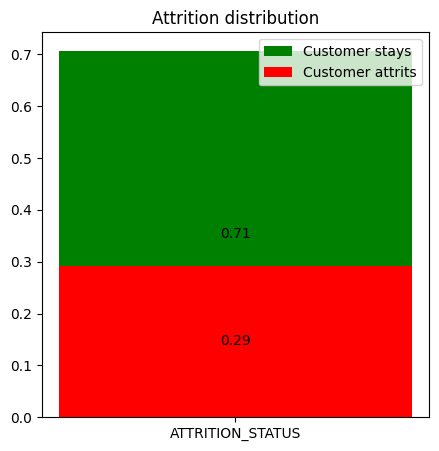

In [ ]:
interest_var_values = data[interest_var].value_counts().reset_index()

interest_var_values['Percentage'] = interest_var_values['ATTRITION_STATUS']/interest_var_values['ATTRITION_STATUS'].sum()

interest_var_0 = interest_var_values[interest_var_values['index']==0]
interest_var_1 = interest_var_values[interest_var_values['index']==1]

interest_var_values

figure1, x = plt.subplots(figsize=(5,5))

bar0 = x.bar(interest_var, interest_var_0['Percentage'], label=interest_var_0, color='green')
bar1 = x.bar(interest_var, interest_var_1['Percentage'], label=interest_var_1, color='red')
x.bar_label(bar0, fmt='%.2f', label_type='center')
x.bar_label(bar1, fmt='%.2f', label_type='center')

plt.legend(['Customer stays','Customer attrits'])
plt.title('Attrition distribution')

### Analysis of correlation between numerical variables

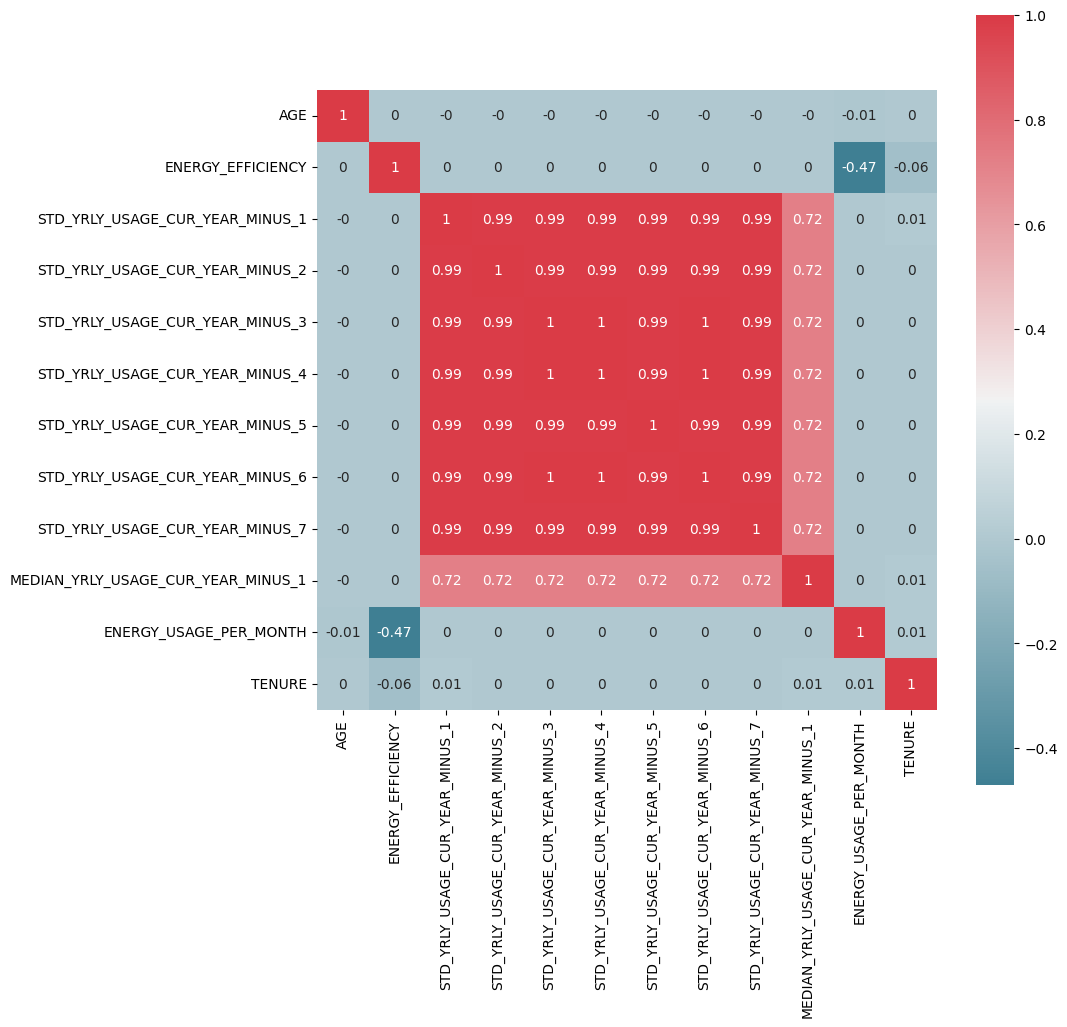

In [ ]:
figure2, x = plt.subplots(figsize=(10,10))

corr = data[numerical_var].corr()
corr = corr.round(2)

temp = sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                   square=True, ax=x, annot=True)

There is a big correlation (almost 1) between the STD_YRLY_USAGE_CUR_YEAR_MINUS_N variables. We will only keep one of the variables because of the high correlation. As the STD_YRLY_USAGE_CUR_YEAR_MINUS_1 is the most recent one, we will keep this one.

In [ ]:
# Correlated columns
cols = ['STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7']

# Drop correlated columns and update dataset
data = data.drop(columns=cols)

# Drop and update numerical_vars list
numerical_var = [i for i in numerical_var if i not in cols]

print(f"We have {len(numerical_var)} variables now")

We have 6 variables now


### Visualization of the different numerical variables

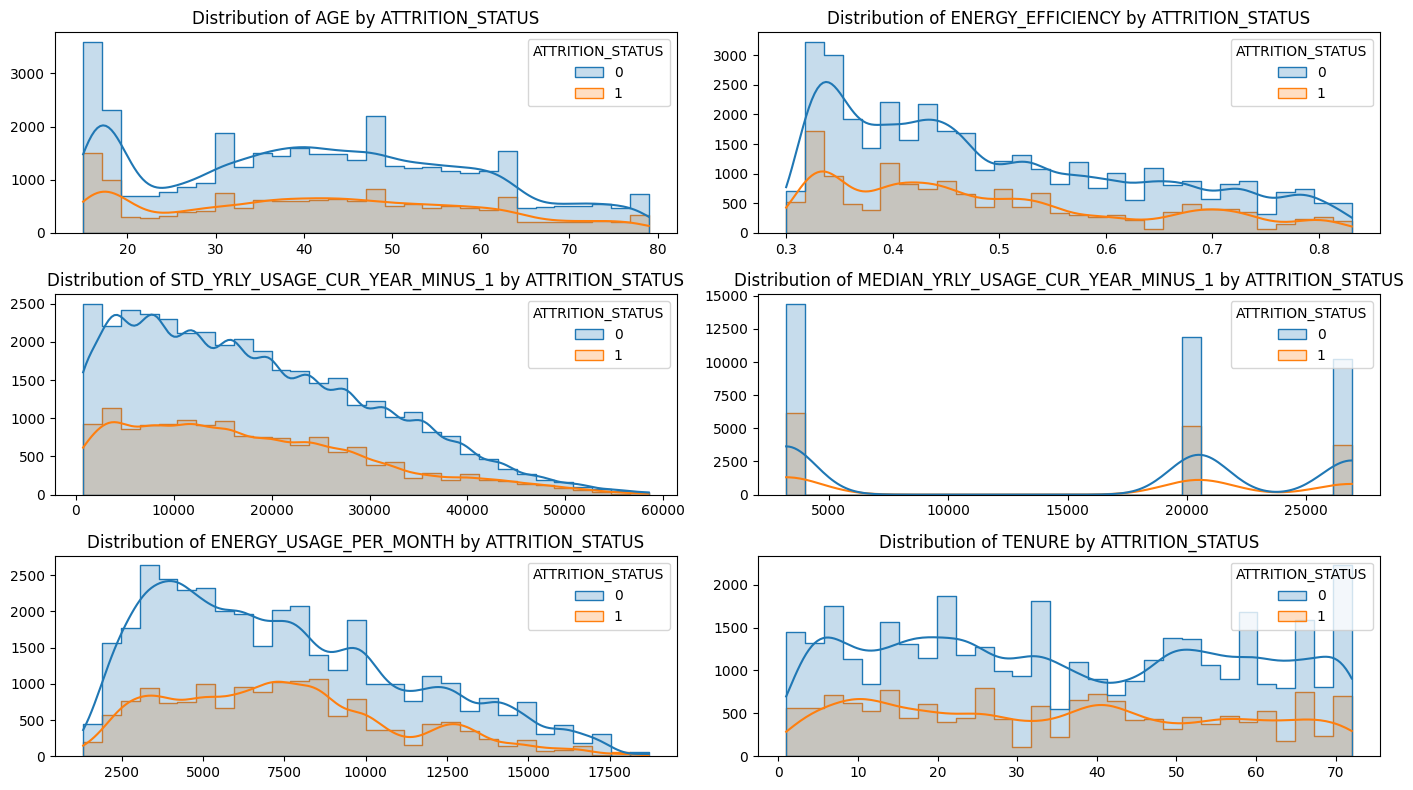

In [ ]:
figure3, axes = plt.subplots(3, 2, figsize=(14, 8))
figure3.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for i, column in enumerate(numerical_var):
    sns.histplot(data=data, x=column, hue='ATTRITION_STATUS', kde=True,
                 bins=30, ax=axes[i], element='step')
    axes[i].set_title(f'Distribution of {column} by ATTRITION_STATUS')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

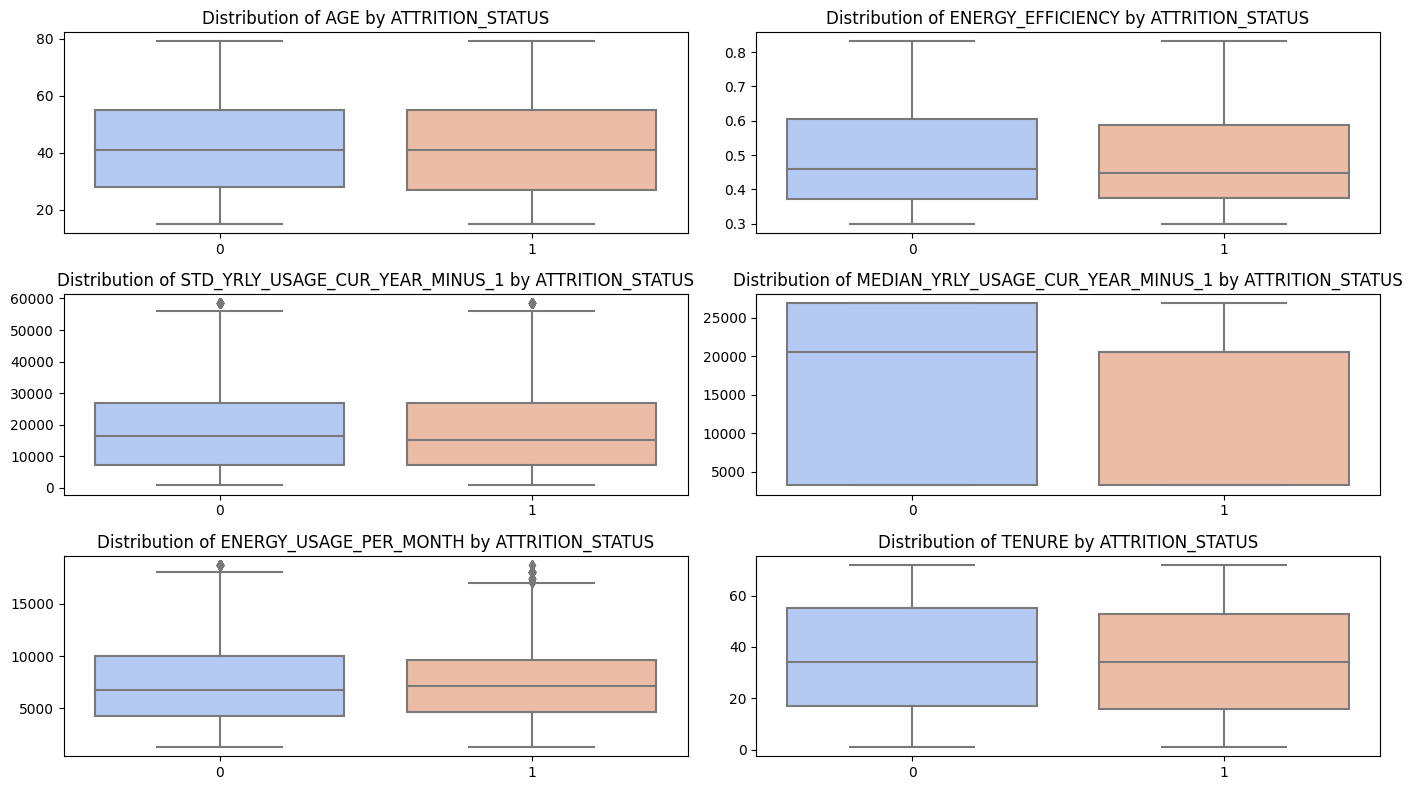

In [ ]:
figure4, axes = plt.subplots(3, 2, figsize=(14,8))
figure4.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for i, column in enumerate(numerical_var):
    sns.boxplot(x='ATTRITION_STATUS', y=column,
                data=data, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by ATTRITION_STATUS')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### Visualization of the different categorical variables

In [ ]:
# Checking if there are still any missing values in the dataset
data.isnull().sum().sum()

0

In [ ]:
for var in categorical_var:
    unique_levels = pd.unique(data[var])
    print(f"{var}: {unique_levels}")
    print("-----"*18)

SMART_METER_COMMENTS: ['Negative' 'Neutral' 'Positive']
------------------------------------------------------------------------------------------
CITY: ['Mountain View' 'Sunnyvale' 'Santa Clara' 'Palo Alto' 'Cupertino']
------------------------------------------------------------------------------------------
CURRENT_OFFER: ['Home Energy Audits' 'Free Energy Audits' 'Rooftop Solar'
 'Small Scale Wind' 'Customer Rebates' 'Integrated Solar' 'Other'
 'Demand Response Program' 'New Construction Incentives']
------------------------------------------------------------------------------------------
CURRENT_CONTRACT: ['Time of Use' 'Dynamic Pricing 240 minute plan']
------------------------------------------------------------------------------------------
CURRENT_ISSUE: ['Replacement phone' 'Billing Issue' 'Best friend cancels' 'Drop Calls'
 'Power Outage' 'Low Voltage' 'Equipment failure' 'GPRS Issue'
 'Network Issue']
------------------------------------------------------------------------

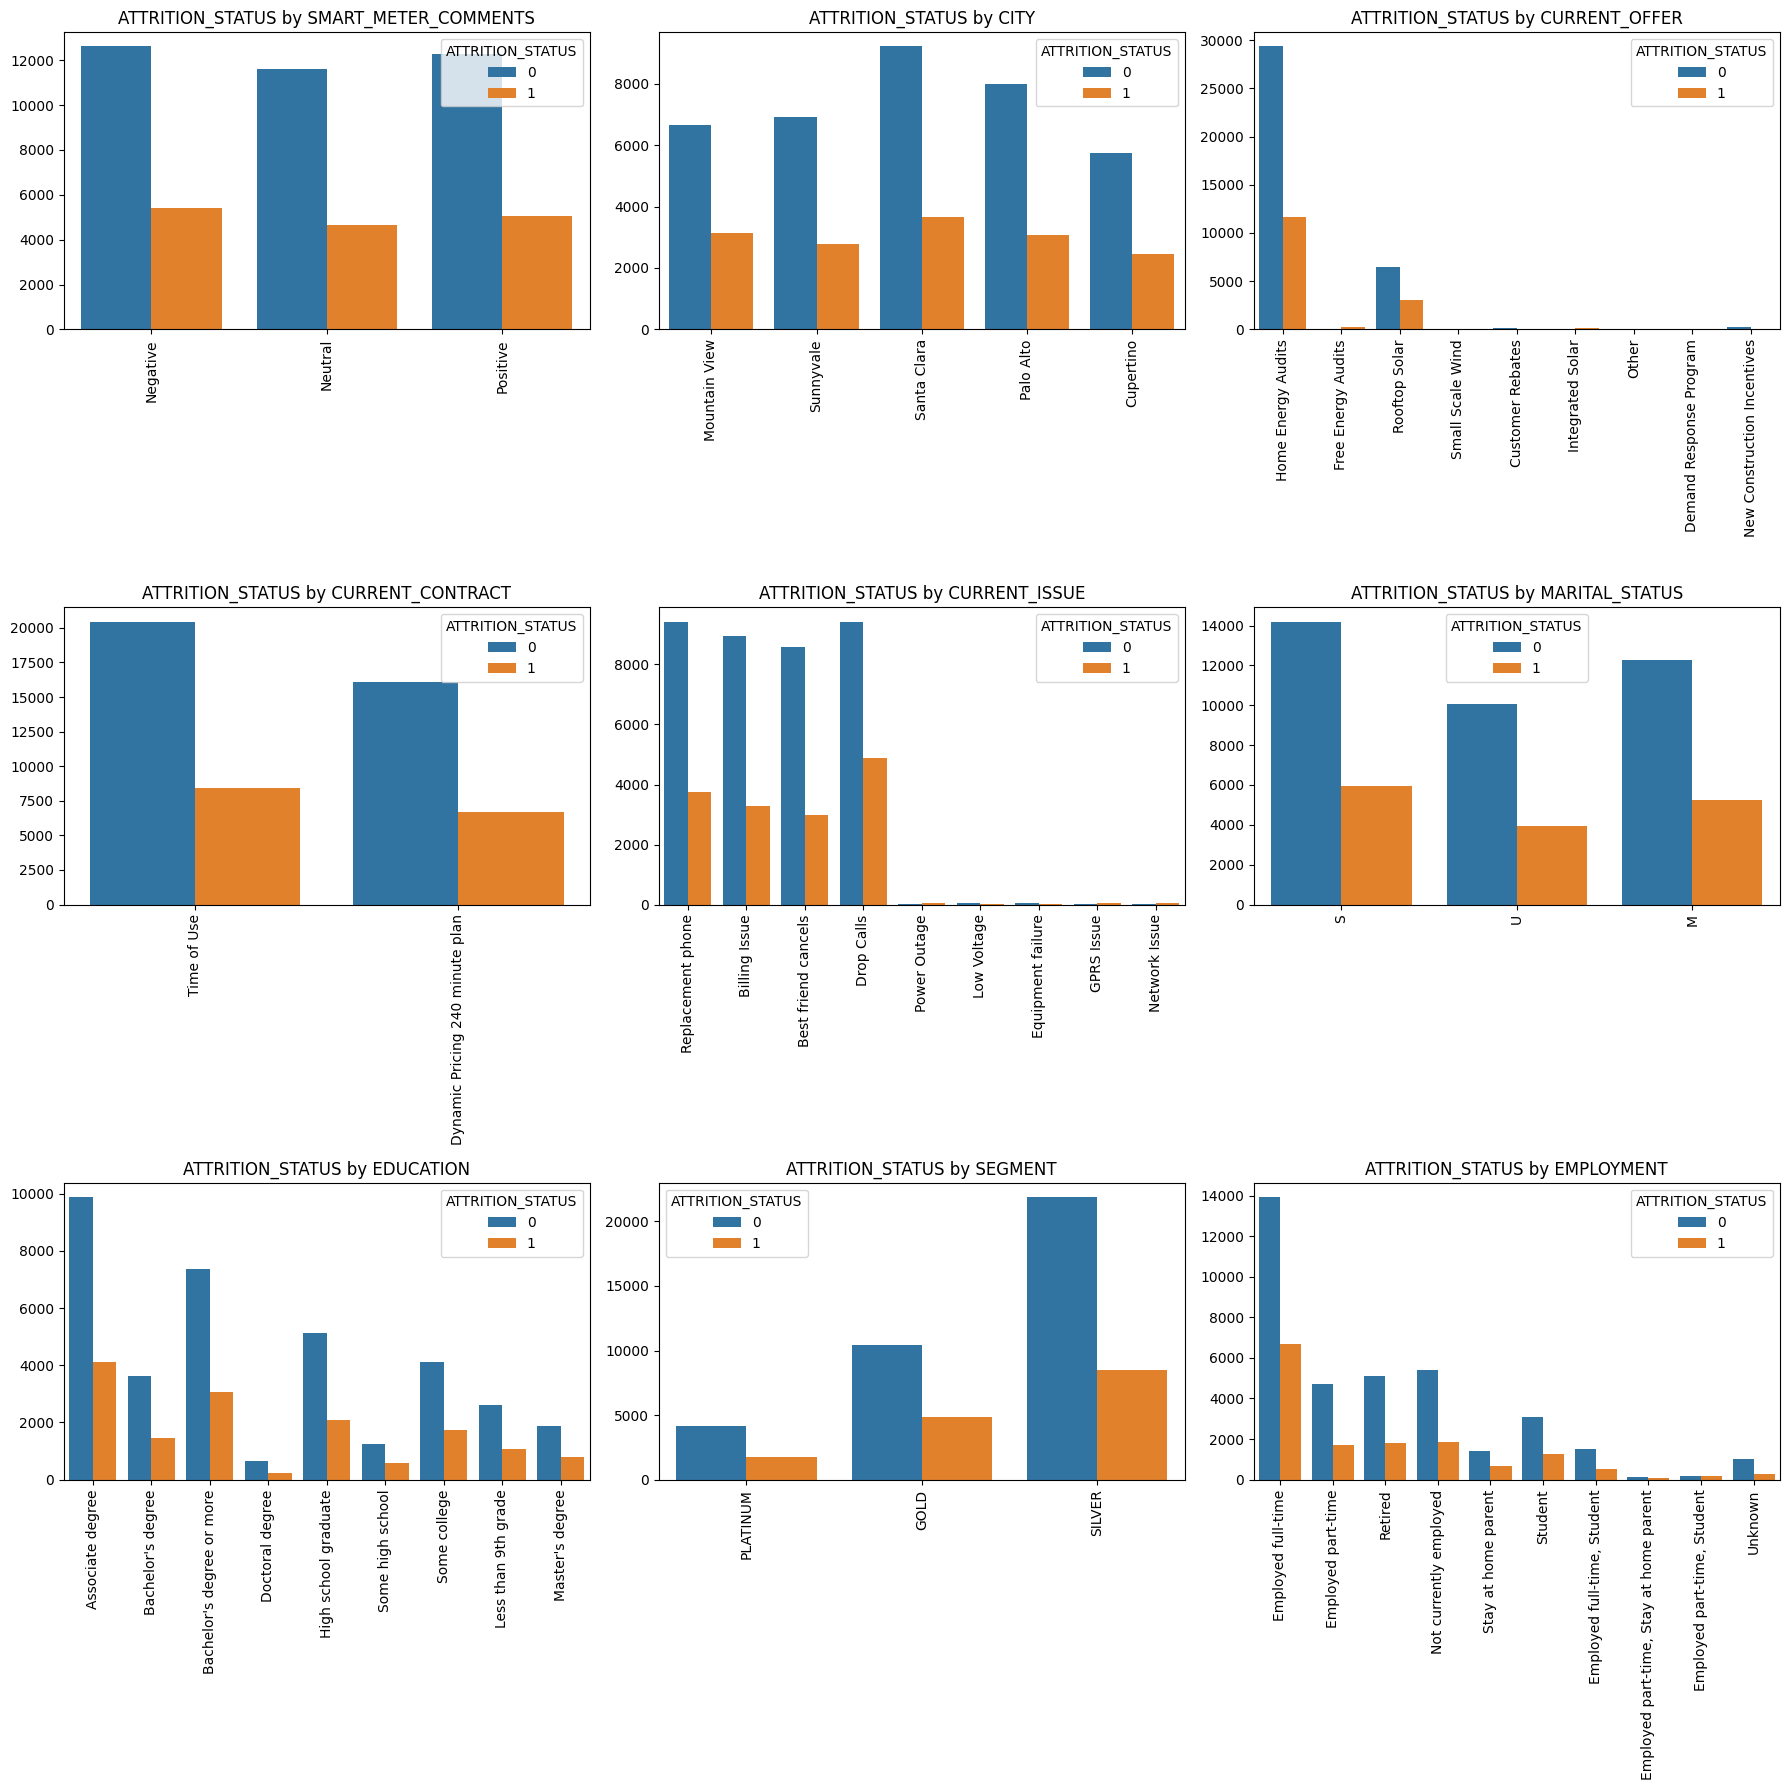

In [ ]:
figure5, axes = plt.subplots(3, 3, figsize=(18,18))
figure5.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for i, column in enumerate(categorical_var):
    sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
    axes[i].set_title(f'ATTRITION_STATUS by {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='ATTRITION_STATUS')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Visualization of the different dummies variables

In [ ]:
#change in the dummies of gender
data['GENDER_ID'] = data['GENDER_ID'].replace([1, 2], [0,1])

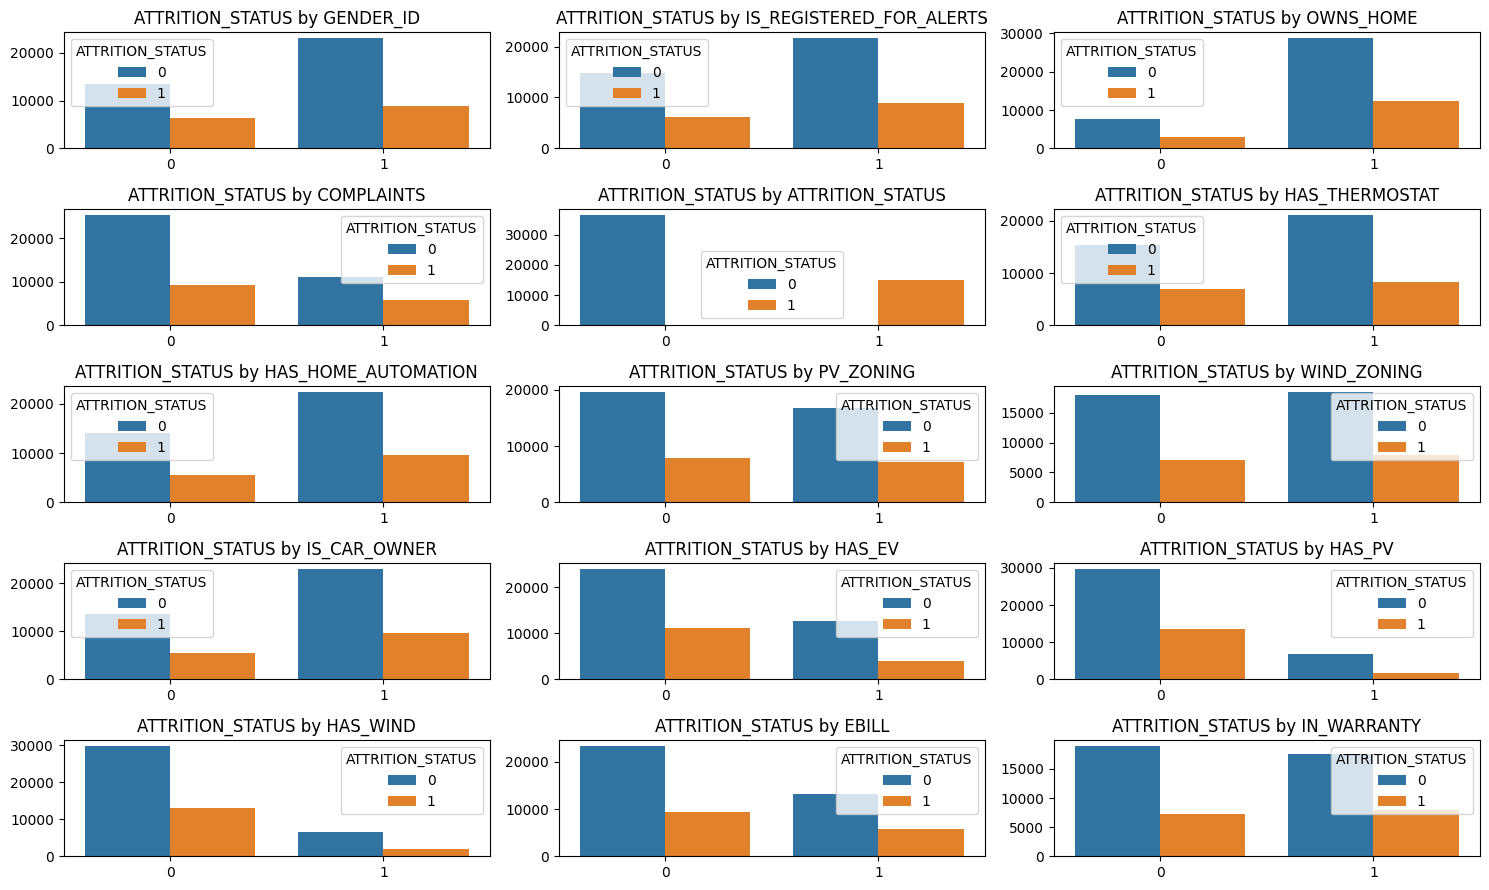

In [ ]:
figure6, axes = plt.subplots(5, 3, figsize=(15,9))
figure6.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(dummy_var):
  sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].legend(title='ATTRITION_STATUS')

plt.tight_layout()
plt.show()

## Extracting the phone number area code of the variable 'PHONE_1' and change it to an USA state

Firstly, we create a dictionary of all the telephone numbers by American zone. This is done from a web page that lists them all.

In [ ]:
scraped_list=pd.read_html('https://www.bennetyee.org/ucsd-pages/area.html')
print("scraped tables " , len(scraped_list))

scraped tables  2


In [ ]:
scraped_list[0].head()

,Area Code,Region,Timezone Offset (from UTC),Description
0,52 55,MX,-6,Mexico: Mexico City area (country code + city ...
1,201,NJ,-5,"N New Jersey: Jersey City, Hackensack (see spl..."
2,202,DC,-5,"Washington, D.C."
3,203,CT,-5,Connecticut: Fairfield County and New Haven Co...
4,204,MB,-6,Canada: Manitoba (see overlay 431)


In [ ]:
area_code_key = scraped_list[0]['Area Code']
region = scraped_list[0]['Region']

area_codes = {area_code_key[i]: region[i] for i in range(len(area_code_key))}

Now, we extract the information from 'PHONE_1'

In [ ]:
# Extract the first three digits of the PHONE_1 (area or region information)
data['Region'] = data['PHONE_1'].str[:3]

In [ ]:
# Extract the useful data for the analysis
region_clusters = data.groupby('Region')['ATTRITION_STATUS'].agg([('Customer stays', lambda x: (x == 0).sum()),
                                                               ('Customer attrits', lambda x: (x == 1).sum())]).reset_index()

region_clusters['Count'] = region_clusters['Customer stays']+region_clusters['Customer attrits']

region_clusters

,Region,Customer stays,Customer attrits,Count
0,201,184,76,260
1,202,120,75,195
2,203,188,137,325
3,205,122,8,130
4,206,252,138,390
...,...,...,...,...
236,973,191,134,325
237,978,262,193,455
238,979,182,13,195
239,985,62,3,65


In [ ]:
# Replace phone zone numbers to USA states
for item in region_clusters['Region']:
  for i in area_codes:
    if item == i:
      region_clusters.replace(item,area_codes[i],inplace=True)

region_clusters = region_clusters.sort_values(by=['Count'], ascending=False)

# Because the web scrapped includes multiple times the same state, the Region is represented multiple times too. We need to concatenate.

region_clusters = region_clusters.groupby('Region').agg({'Customer stays': 'sum', 'Customer attrits': 'sum', 'Count': 'sum'}).reset_index()

# Display the top 10 most represented zones

region_clusters.head(10)

,Region,Customer stays,Customer attrits,Count
0,AK,63,67,130
1,AL,450,265,715
2,AR,255,200,455
3,AZ,629,216,845
4,CA,3285,1460,4745
5,CO,633,277,910
6,CT,500,150,650
7,DC,120,75,195
8,DE,71,124,195
9,FL,2147,1168,3315


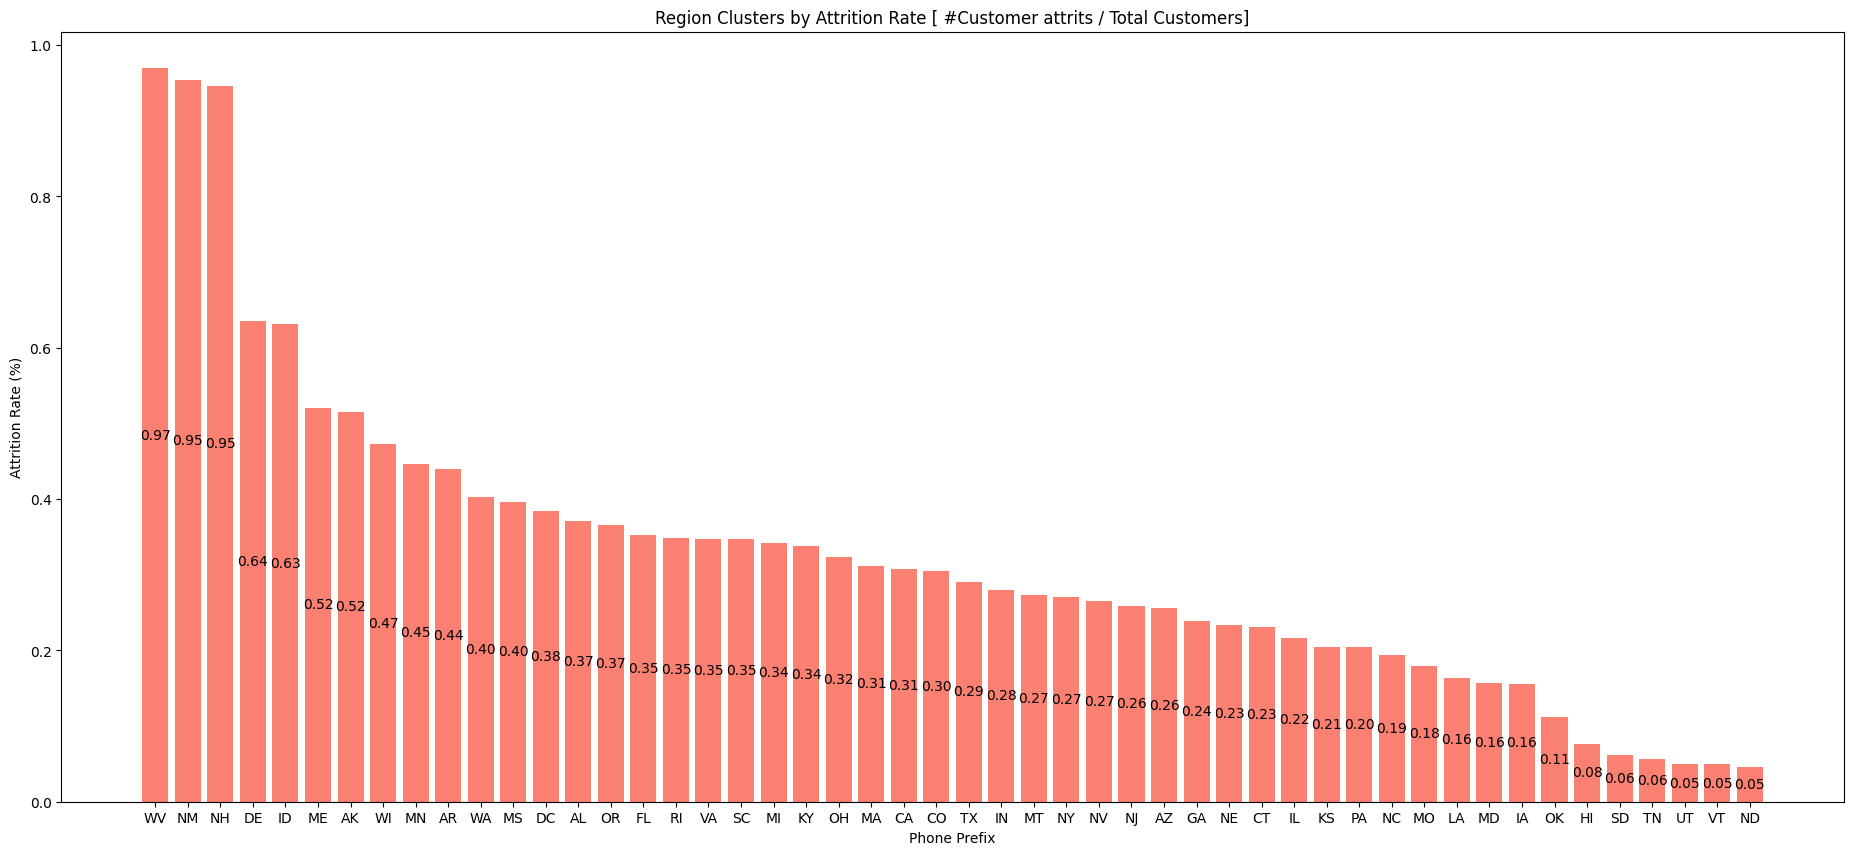

In [ ]:
# Compute the attrition rate

region_clusters['Attrition rate'] = region_clusters['Customer attrits']/region_clusters['Count']

# Sorting the clusters by the rate of attrition

region_clusters = region_clusters.sort_values(by=['Attrition rate'], ascending=False)

# Plotting Region clusters by attrition rate

figure7, x = plt.subplots(figsize=(23,10))

bar = plt.bar(region_clusters['Region'], region_clusters['Attrition rate'], color='salmon')
x.bar_label(bar, fmt='%.2f', label_type='center')


plt.title('Region Clusters by Attrition Rate [ #Customer attrits / Total Customers]')
plt.xlabel('Phone Prefix')
plt.ylabel('Attrition Rate (%)')
plt.show()

In [ ]:
# How many values are missing?
missing_values_calculation(region_clusters)

,Total,Percent
Region,0,0.0
Customer stays,0,0.0
Customer attrits,0,0.0
Count,0,0.0
Attrition rate,0,0.0


In [ ]:
# Display a map of USA

import plotly.graph_objects as go

figure8 = go.Figure(data=go.Choropleth(
    locations=region_clusters['Region'], # Spatial coordinates
    z = region_clusters['Attrition rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "% Attrition rate",
))

figure8.update_layout(
    title_text = 'Attrition rate by US State',
    geo_scope='usa', # limite map scope to USA
)

figure8.show()